A2: Model Development in Python (Team) - Team 2


In the competitive landscape of the airline industry, companies like Air France are constantly exploring innovative strategies to enhance their market share and profitability. The case illustrates the airline’s strategic effort to optimize its Search Engine Marketing (SEM) campaigns across different platforms. This study analyzes how to refine its advertising approach to maximize return on investments in marketing and effectively target diverse consumers.


<h2> Import libraries and preparation </h2>

In [1]:
## Importing libraries ##

# For this template submission
import numpy                 as np                         # mathematical essentials
import pandas                as pd                         # data science essentials
import sklearn.linear_model                                # linear models
from sklearn.model_selection import train_test_split       # train/test split
import matplotlib.pyplot     as plt                        # essential graphical output
import seaborn               as sns                        # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs
# new libraries
from sklearn.preprocessing   import StandardScaler         # standard scaler
import warnings                                            # warnings from code
from sklearn.tree            import DecisionTreeRegressor  # DecisionTreeRegressor
from sklearn.linear_model    import Ridge, Lasso           # Ridge and Lasso Regression
from sklearn.linear_model    import SGDRegressor           # SGD Regressor
from sklearn.neighbors       import KNeighborsRegressor    # KNN
from sklearn.model_selection import RandomizedSearchCV    
from scipy.stats             import randint
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder           # from Datacamp
from sklearn.metrics import mean_squared_error, r2_score
import warnings                                        # warnings from code

# Suppressing warnings
warnings.filterwarnings(action = 'ignore')

# Setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
## Importing data ##

# Reading modeling data into Python
modeling_data = '/Users/kimberly/Downloads/train1.xlsx'

# Calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 0,
                         header     = 0,
                         index_col  = 'entry_id')



# Reading testing data into Python
testing_data = '/Users/kimberly/Downloads/test1.xlsx'

# Calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 0,
                        header     = 0,
                        index_col  = 'entry_id')

In [3]:
# Concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# Concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)

# Checking data
df_full.head(n = 5)

,Publisher Name,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Status,Search Engine Bid,Impressions,Avg. Pos.,Avg. Cost per Click,Clicks,set
entry_id,,,,,,,,,,,,,,
mkt_001,Google - Global,fly to nice,Broad,Air France Global Campaign,Nice,nice,Position 1- 3,Unavailable,1.25,380,1.85,0.95,15.0,Not Kaggle
mkt_002,Yahoo - US,munich airport,Advanced,Western Europe Destinations,Munich,uncategorized,NaN,Paused,6.25,25,1.84,5.71,1.0,Not Kaggle
mkt_003,Overture - Global,chicago to paris,Advanced,Unassigned,Unassigned,paris,Position 1-2 Target,Sent,0.45,2315,4.48,0.43,14.0,Not Kaggle
mkt_005,Yahoo - US,discount international airfare,Advanced,Geo Targeted Los Angeles,Discount International Los Angeles,uncategorized,NaN,Paused,6.25,86,1.42,2.45,9.0,Not Kaggle
mkt_006,Google - US,cont:google_yearlong 2006::google|marrakech,NaN,Google_Yearlong 2006,Google|marrakech,uncategorized,NaN,Unavailable,7.50,19,1.53,4.63,1.0,Not Kaggle


<h2> Base Modeling </h2>

<h3> Data Exploration </h3>

In [4]:
# Get the information for all variables
df_full.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 4510 entries, mkt_001 to mkt_3040
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publisher Name       4510 non-null   object 
 1   Keyword              4510 non-null   object 
 2   Match Type           4462 non-null   object 
 3   Campaign             4510 non-null   object 
 4   Keyword Group        4510 non-null   object 
 5   Category             4510 non-null   object 
 6   Bid Strategy         3286 non-null   object 
 7   Status               4510 non-null   object 
 8   Search Engine Bid    4510 non-null   float64
 9   Impressions          4510 non-null   int64  
 10  Avg. Pos.            4510 non-null   float64
 11  Avg. Cost per Click  4510 non-null   float64
 12  Clicks               4410 non-null   float64
 13  set                  4510 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 528.5+ KB


In [5]:
# Get the descriptive stats for the train dataset
df_train.describe().round(decimals = 3)

,Search Engine Bid,Impressions,Avg. Pos.,Avg. Cost per Click,Clicks
count,4410.000,4410.000,4410.000,4410.000,4410.000
mean,5.444,8929.176,1.931,1.894,103.585
std,3.294,170886.063,1.078,1.319,1029.107
min,0.000,1.000,0.000,0.040,1.000
25%,3.750,27.000,1.140,0.830,1.000
50%,6.250,171.000,1.590,1.660,4.000
75%,6.250,829.000,2.310,2.660,18.000
max,27.500,8342415.000,15.000,10.000,34012.000


<h3> Dealing with NA values </h3>

In [6]:
# Search for the null values
df_full.isnull().sum(axis = 0)

Publisher Name            0
Keyword                   0
Match Type               48
Campaign                  0
Keyword Group             0
Category                  0
Bid Strategy           1224
Status                    0
Search Engine Bid         0
Impressions               0
Avg. Pos.                 0
Avg. Cost per Click       0
Clicks                  100
set                       0
dtype: int64

In [7]:
# Filling the null values
df_full['Match Type'].fillna(value   = 'Other'   ,
                               inplace = True)

df_full['Bid Strategy'].fillna(value   = 'Other'   ,
                               inplace = True)

# Search for the null values
df_full.isnull().sum(axis = 0) 

Publisher Name           0
Keyword                  0
Match Type               0
Campaign                 0
Keyword Group            0
Category                 0
Bid Strategy             0
Status                   0
Search Engine Bid        0
Impressions              0
Avg. Pos.                0
Avg. Cost per Click      0
Clicks                 100
set                      0
dtype: int64

<h3> Data Cleaning </h3>

In [8]:
# Define the mapping for the replacements
replacement_mapping = {
    "Pos 3-6": "Position 3-6",
    "Position 1- 3": "Position 1-3",
    "Position 1 -2 Target": "Position 1-2 Target",
    "Position 1-2 Target": "Position 1-2 Target",  # This is already correct, but included for clarity
    "Postiion 1-4 Bid Strategy": "Position 1-4 Bid Strategy",
    "Position 1-4 Bid Strategy": "Position 1-4 Bid Strategy",# This is already correct, but included for clarity
    "Position 5-10 Bid Strategy": "Position 5-10 Bid Strategy",# This is already correct, but included for clarity
    "Other": "Other"# This is already correct, but included for clarity
}

# Apply the replacements to the 'Bid Strategy' column in both DataFrames
df_full['Bid Strategy'] = df_full['Bid Strategy'].replace(replacement_mapping)

<h3> Visualizations </h3>

<h4> Correlation Heatmap </h4>

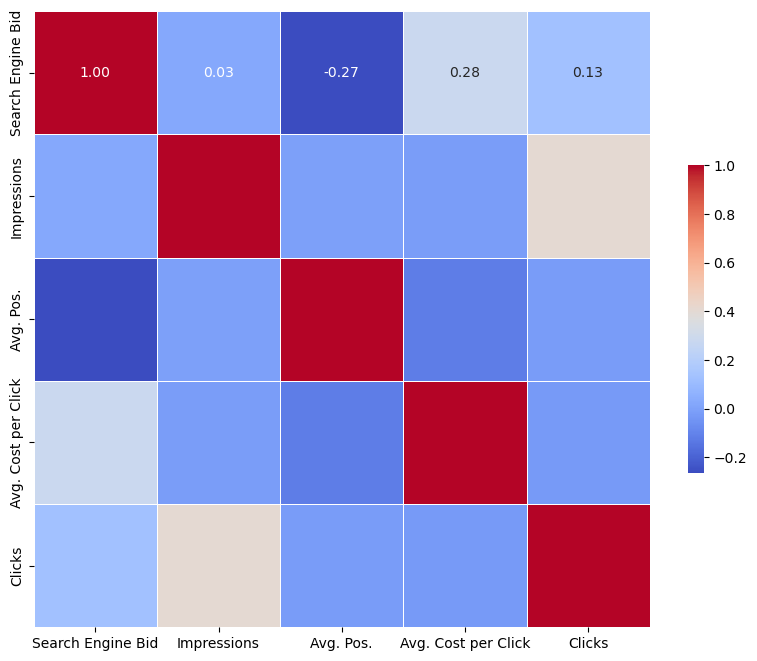

In [9]:
# Create a correlation heatmap to understand the correlations in the dataset


# Select columns with numeric data types
numeric = df_train.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot 
plt.show()

This correlation heatmap shows that there are not many strong correlations to the feature 'Clicks'. However, there is a medium to strong correlation between 'Impressions' and 'Clicks'. In addition to that it is noticeable that there are several negative correlations between 'Clicks' and other features too.

<h4> Bar Charts </h4>

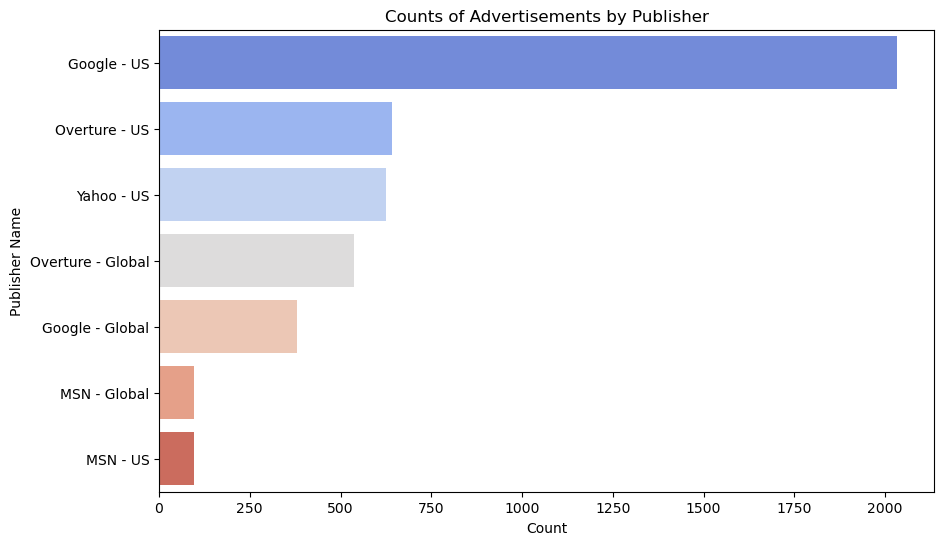

In [10]:
# Counts of Advertisements by Publisher

# Calculate the counts for each 'Publisher Name'
publisher_counts = df_train['Publisher Name'].value_counts().reset_index()
publisher_counts.columns = ['Publisher Name', 'Count']

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Publisher Name', data=publisher_counts, palette='coolwarm')
plt.title('Counts of Advertisements by Publisher')
plt.xlabel('Count')
plt.ylabel('Publisher Name')
plt.show()

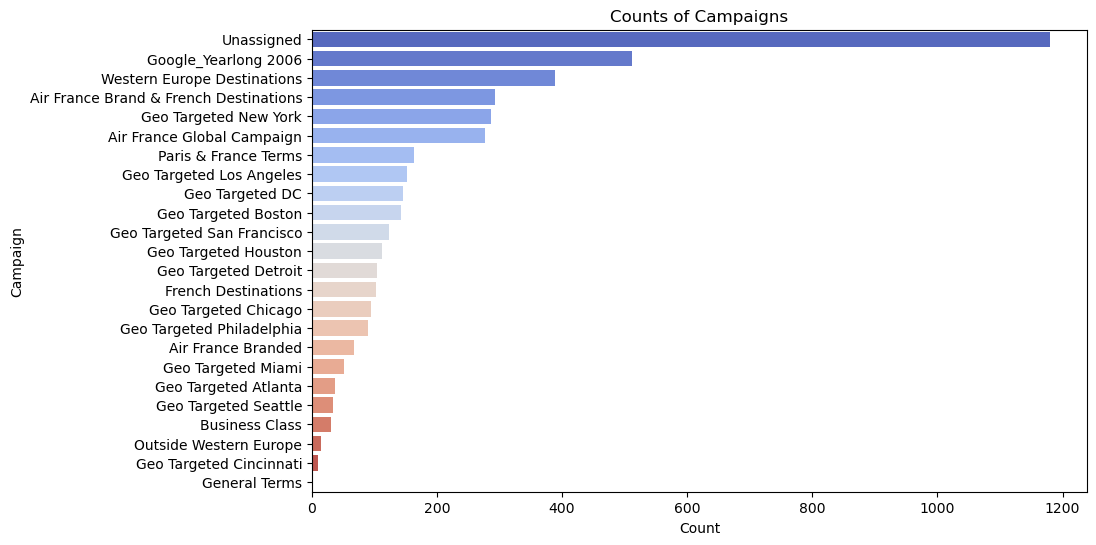

In [11]:
# Counts of Campaigns

# Calculate the counts for each 'Campaign'
publisher_counts = df_train['Campaign'].value_counts().reset_index()
publisher_counts.columns = ['Campaign', 'Count']

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Campaign', data=publisher_counts, palette='coolwarm')
plt.title('Counts of Campaigns')
plt.xlabel('Count')
plt.ylabel('Campaign')
plt.show()

The two previous bar charts offer a good understanding of the data set. The first one with the title 'Counts of Advertisements by Publisher' shows, that Google in the US is by far the most used publisher. The total count of more than 2,000 is equal to the sum of the next three publishers 'Overture - US', 'Yahoo - US', and 'Overture - Global'. In general, it is important to mention that numberwise, the US market is stronger than the global one. Also noticeable is the weak performance/usage of MSN, who come in in the last two places (global and US).
The bar chart with the title 'Counts of Campaigns' is more detailed as there are more categories available. The highest count belongs to the category with unassigned campaigns. After that 'Google_Yearlong 2006' and 'Western Europe Destinations' are the two strongest, being the only ones with a higher count than 400. Overall, there are many campaigns with a smaller count than 100, the three smallest ones being represented by (in that order) 'General Terms', 'Geo Targeted Cincinnati' and 'Outside Europe'.


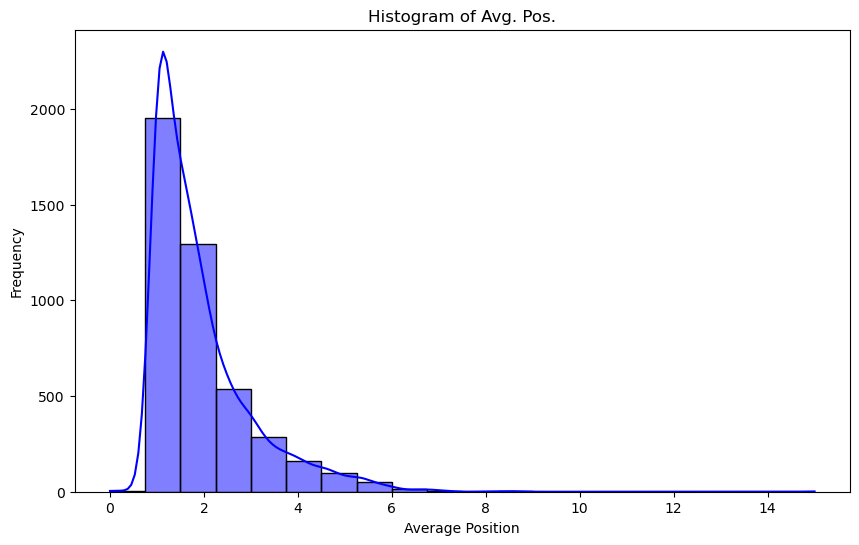

In [12]:
# Histogram of Avg. Pos.
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Avg. Pos.'], bins=20, kde=True, color='blue')
plt.title('Histogram of Avg. Pos.')
plt.xlabel('Average Position')
plt.ylabel('Frequency')
plt.show()

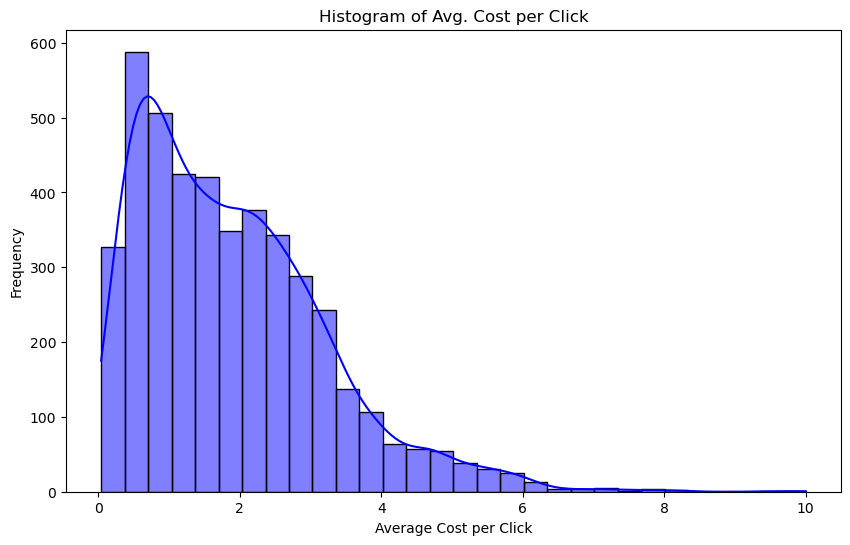

In [13]:
# Histogram of Avg. Cost per Click
# Create a histogram for the 'Avg. Cost per Click'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Avg. Cost per Click'], bins=30, kde=True, color='blue')
plt.title('Histogram of Avg. Cost per Click')
plt.xlabel('Average Cost per Click')
plt.ylabel('Frequency')
plt.show()

These two histograms visualize the distribution of 'Avg. Pos.' and 'Avg. Cost per Click'. Both of them are right skewed and have a long tail attached. The spread of the data towards the right indicates there are advertisements with higher average positions, but these are less common. In addition to that, the tail extending to the right suggests outliers in the data, with a few advertisements having an average position which is significantly higher than the rest. The other histogram about the average cost per click has a bulk of the data concentrated towards the left, indicating lower costs per click are more frequent. There is a clear peak, indicating that the most common cost per click is slightly less than the median of the dataset, after which the frequency levels off. The distribution decreases steadily as the cost per click increases, showing that higher costs per click are increasingly rare.
The average position of an advertisement does not have as many different options as the average cost per click. Thus, the number of bins for 'Avg. Pos.' is 20, whereas it is 30 for 'Avg. Cost per Click'. This should also help to make the histogram more detailed and provide a better quality of the data that is visualized.


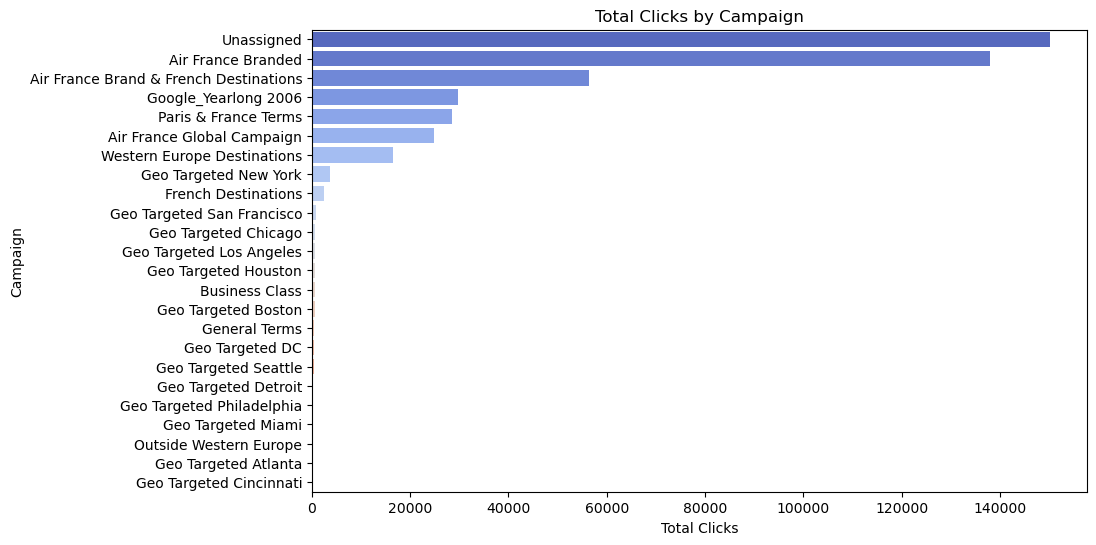

In [14]:
# Total Clicks by Campaign

# Group by Campaign and count the sum of Clicks
campaign_clicks = df_train.groupby('Campaign')['Clicks'].sum().reset_index()

# Ascending the result
campaign_clicks_sorted = campaign_clicks.sort_values('Clicks', ascending=False)

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Clicks', y='Campaign', data=campaign_clicks_sorted, palette='coolwarm')
plt.title('Total Clicks by Campaign')
plt.xlabel('Total Clicks')
plt.ylabel('Campaign')
plt.show()

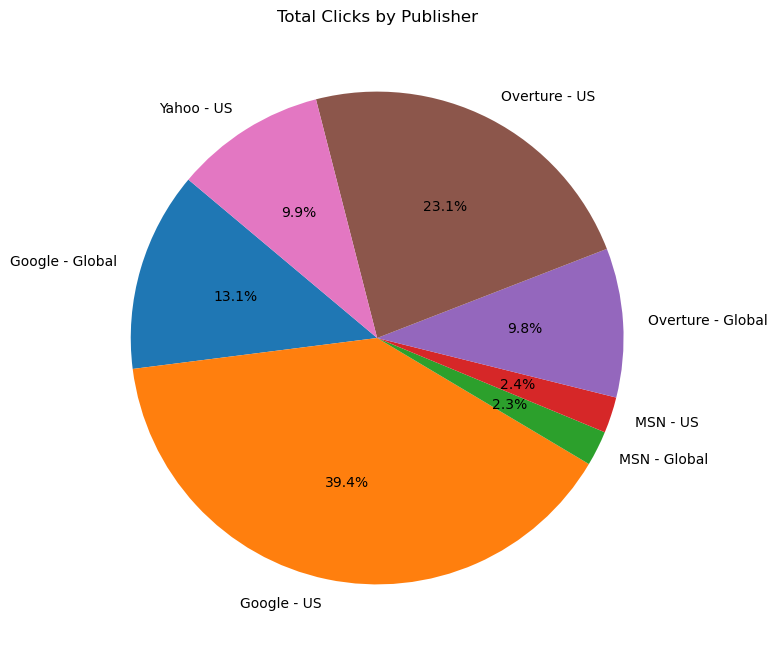

In [15]:
# Total Clicks by Publisher

# Group by Publisher Name and count Clicks sum
publisher_clicks = df_train.groupby('Publisher Name')['Clicks'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(publisher_clicks['Clicks'], labels=publisher_clicks['Publisher Name'], autopct='%1.1f%%', startangle=140)
plt.title('Total Clicks by Publisher')
plt.show()

The two available visualizations provide insightful information about how different advertising campaigns succeed and how clicks are distributed among sites.
Starting with the "Total Clicks by Campaign" bar chart, we can see that there is a distinct hierarchy in terms of campaign efficiency. With the most clicks, the 'Air France Branded' campaign is the most noticeable and shows great audience engagement. 'Google_Yearlong 2006' and 'Air France Brand & French Destinations' come next. The strategic selection of which campaigns to optimize or prioritize can be influenced by such variations in click-through rates.
"Total Clicks by Publisher" pie chart organizes the clicks according to the publishing platform. With 39.4% of the market, "Google - US" has the biggest share and is a key source of traffic. Other significant participants are "Google - Global" and "Overture - US," underscoring the significance of these platforms in digital advertising tactics. 'MSN-Global' and 'MSN-US' taken together have a reduced share, which may indicate that these platforms are not as important or that campaigns need to be adjusted. We aim to predict clicks, thus these analyses are essential. We can determine the most effective combinations by analyzing the click distribution by publisher and campaign. We can identify trends and make data-driven choices to deploy resources more effectively in next campaigns by looking over our training dataset. The variations in click distribution also imply that whereas certain publishers and campaigns have high levels of engagement, others can benefit from a reevaluation or retargeting in order to improve their effectiveness.


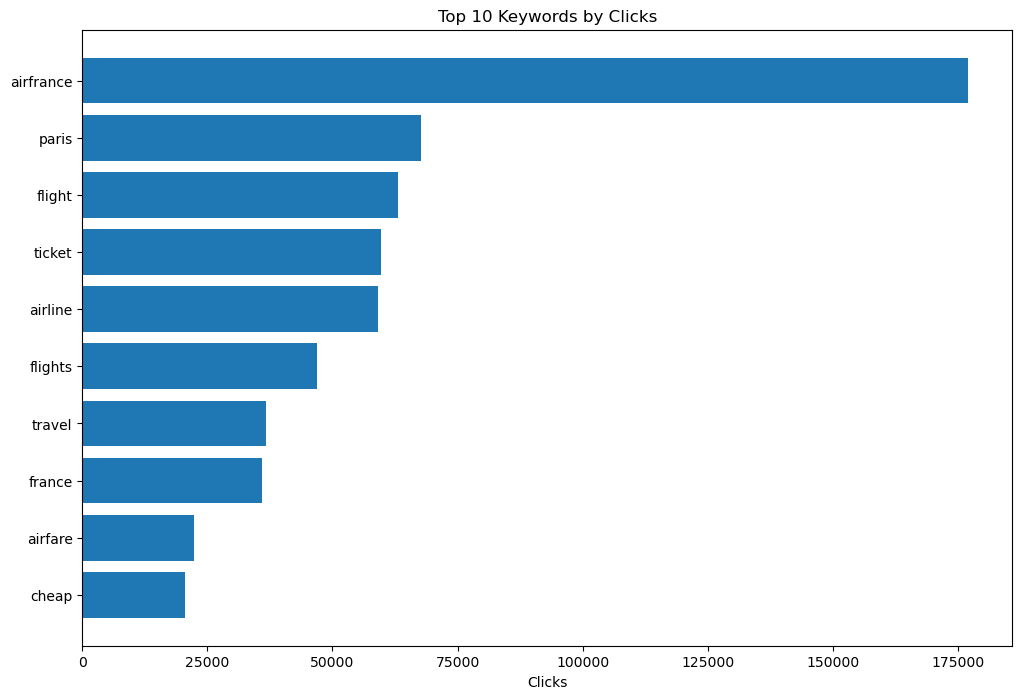

In [16]:
# Create a new DataFrame containing only the necessary columns
df_temp = df_train[['Keyword', 'Clicks']].copy()

# Define the rules for keyword combination in our dataset
combinations_to_merge = {
    ("new", "york"): "nework",
    ("los", "angeles"): "losangeles",
    ("san", "francisco"): "sanfrancisco",
    ("san", "diego"): "sandiego",
}

# Preprocess df_temp by removing 'to' and calculating the threshold for high-frequency words
df_temp['Keyword'] = df_temp['Keyword'].str.replace(r'\bto\b', '', regex=True) # regex=True: Use regular expressions for pattern matching 


# Standardize the variations of keywords
df_temp['Unified Keyword'] = df_temp['Keyword'].str.replace(r'(\[?air\sfrance\]?)', 'airfrance', regex=True) # Match "airfrance" or "[airfrance]" in the string

# Merge keywords according to the defined rules
for words_to_combine, replacement in combinations_to_merge.items():
    pattern = ' '.join(words_to_combine)
    df_temp['Unified Keyword'] = df_temp['Unified Keyword'].str.replace(pattern, replacement, regex=False)

# Handle entries related to "google_yearlong 2006::google"
df_temp['Unified Keyword'] = df_temp['Unified Keyword'].apply(lambda x: 'google_yearlong_related' if 'google_yearlong 2006::google' in x else x)

# Split keywords, creating a new column to store the split keywords
df_temp['Split Keywords'] = df_temp['Unified Keyword'].apply(lambda x: x.split() if 'google_yearlong_related' not in x else [x]) # Split the keywords by space if 'google_yearlong_related' is not in the keyword, otherwise, treat it as a single list


# Transform the DataFrame so that each keyword is on a separate row
df_temp_exploded = df_temp.explode('Split Keywords')

# Calculate the total number of clicks for each keyword
keyword_clicks = df_temp_exploded.groupby('Split Keywords')['Clicks'].sum().reset_index()

# Sort keywords based on the number of clicks to identify highly correlated ones
keyword_clicks_sorted = keyword_clicks.sort_values(by='Clicks', ascending=False)

# Select the top 10 keywords
top_keywords = keyword_clicks_sorted.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_keywords['Split Keywords'], top_keywords['Clicks'])
plt.title('Top 10 Keywords by Clicks')
plt.xlabel('Clicks')

# Invert the y-axis so that the highest value is at the top of the plot
plt.gca().invert_yaxis()
plt.show()

The "Top 10 Keywords by Clicks" bar chart provides an analytical view of keyword performance, affirming that "airfrance", the central subject of our case study, is a high-frequency term, indicating that consumers are drawn to the brand in large quantities. In order to maximize keyword strategy for next ads and guarantee that the focus is on the most captivating phrases for the intended audience, the data from this chart be crucial.


<h2> Feature Engineering </h2>

<h3> Feature 1: Keyword Count </h3>

In [17]:
# Feature 1: Keyword Count
df_full['Keyword Count'] = df_full['Keyword'].apply(lambda x: len(x.split()))


By figuring out each keyword's word count, we can do feature engineering on keywords and generate a new feature column called "Keyword Count."We can gain a better understanding of each keyword's length or word count with the aid of this new capability, which could be helpful when evaluating and interpreting the data.


<h3> Feature 2: Keyword Length </h3>

In [18]:
# Feature 2: Keyword Length (including spacing)
df_full['Keyword Length'] = df_full['Keyword'].apply(len)

"Keyword Length," calculated from each keyword's character count. We can learn more about the time span of each keyword due to this feature, which could lead to the discovery of additional insightful information in the data. 

<h3> Feature 3: Performance Score </h3>

In [19]:
# Feature 3: Performance Score

# Normalize Avg. Pos., Avg. Cost per Click and Impressions to have a common scale
df_full['Normalized Search Engine Bid'] = (df_full['Search Engine Bid'] - df_full['Search Engine Bid'].min()) / (df_full['Search Engine Bid'].max() - df_full['Search Engine Bid'].min())
df_full['Normalized Impressions'] = (df_full['Impressions'] - df_full['Impressions'].min()) / (df_full['Impressions'].max() - df_full['Impressions'].min())
df_full['Normalized Avg Pos'] = (df_full['Avg. Pos.'] - df_full['Avg. Pos.'].min()) / (df_full['Avg. Pos.'].max() - df_full['Avg. Pos.'].min())
df_full['Normalized Avg CPC'] = (df_full['Avg. Cost per Click'] - df_full['Avg. Cost per Click'].min()) / (df_full['Avg. Cost per Click'].max() - df_full['Avg. Cost per Click'].min())

# Assuming equal weight for simplicity, but you might want to adjust these
weights = {'pos': 1/3, 'cpc': 1/3, 'imp': 1/3}
df_full['Performance Score'] = weights['pos'] * df_full['Normalized Avg Pos'] + weights['cpc'] * df_full['Normalized Avg CPC'] + weights['imp'] * df_full['Normalized Impressions']

In order to promote comparison and unified analysis, these feature engineering processes seek to Normalized measurements like average position (Avg. Pos. ), average cost per click (Avg. Cost per Click), and impressions to a single scale.
Here, we transform each metric's values into a range between 0 and 1 using the min-max normalization approach. By guaranteeing the comparability of many indicators, this method makes thorough analysis and model training easier.
Finally, we calculate a performance score using equal weights by combining the metrics of average position, average cost per click, and impressions. This performance score may offers valuable insights for optimizing advertising tactics by assisting in the overall evaluation of the performance of adverts across many parameters.


<h3> Feature 4: Impressions Label </h3>

In [20]:
# Feature 4: Impressions_Level
# Adding a new feature 'Impressions Label' based on the 'Impressions' column

low_threshold = np.percentile(df_train['Impressions'], 25)
high_threshold = np.percentile(df_train['Impressions'], 90)

# define the row and Impressions Label
def set_impression_category(row, low_threshold, high_threshold):
     if row['Impressions'] < low_threshold:
        return 'Low'
     elif row['Impressions'] > high_threshold:
        return 'High'
     else:
        return 'Medium'

# create new category and apply to each row
df_full['Impression_Category'] = df_full.apply(set_impression_category, axis=1, args=(low_threshold, high_threshold))

# binary them
df_full['Low_Impressions'] = (df_full['Impression_Category'] == 'Low').astype(int)
df_full['Medium_Impressions'] = (df_full['Impression_Category'] == 'Medium').astype(int)
df_full['High_Impressions'] = (df_full['Impression_Category'] == 'High').astype(int)

Based on the 'Impressions' column, the goal of this feature engineering operation is to introduce a new feature called 'Impressions Label'.
'Impressions' and 'Clicks' have a correlation coefficient of 0.4, which is regarded as a strong correlation in comparison to other numerical values.
We use train dataset to calculate the impressions' percentiles to construct three categories: low, medium, and high. We can analyze and make decisions more precisely thanks to this classification, which gives us a greater understanding of the impression level for each advertisement.
In order to facilitate additional modeling and analysis, we binary encode these categories at this point, turning them into 0s and 1s.


<h3> Feature 5: OneHotEncoder </h3>

In [21]:
# One hot encode for Publisher Name and also group them
publisher_mapping = {
    'MSN - Global': 'MSN',
    'MSN - US': 'MSN',
    'Yahoo - US': 'Yahoo'
}

# Apply the mapping to group the 'Publisher Name'
df_full['Publisher Name'] = df_full['Publisher Name'].replace(publisher_mapping)

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Perform one-hot encoding on the 'Publisher Name' column
encoded_publishers = ohe.fit_transform(df_full[['Publisher Name']])

# Get the feature names for the encoded columns
encoded_publishers_names = ohe.get_feature_names_out()

# Create a DataFrame with the encoded features and the correct column names
encoded_publishers_df = pd.DataFrame(encoded_publishers, index=df_full.index, columns=encoded_publishers_names)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df_full = pd.concat([df_full, encoded_publishers_df], axis=1)
df_full.drop('Publisher Name', axis=1, inplace=True)

This feature engineering procedure groups them after completing one-hot encoding for the 'Publisher Name' column. A mapping dictionary is used to combine names belonging to comparable publishers into a single group in the 'Publisher Name' column. For instance, "Yahoo - US" is mapped to "Yahoo," whereas "MSN - Global" and "MSN - US" are mapped to "MSN. However, we didn't group Google and Overture because their significance is evident in the chart "Total Clicks by Publisher", where Google-US accounts for 39.4% and Overture-US accounts for 23.1%. Next, we encode the 'Publisher Name' field one-hot using OneHotEncoder. In doing so, the original categorical feature is transformed into several binary feature columns, each of which represents a potential category. 


In [22]:
# One hot encode for categorical_columns : Match Type, Bid Strategy, Status
categorical_columns = ['Match Type', 'Bid Strategy', 'Status']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Perform one-hot encoding on the categorical_columns
encoded_features = ohe.fit_transform(df_full[categorical_columns])

# Perform one-hot encoding on the categorical_columns
encoded_feature_names = ohe.get_feature_names_out(categorical_columns)

# Get the feature names for the encoded columns
encoded_features_df = pd.DataFrame(encoded_features, index=df_full.index, columns=encoded_feature_names)

# Create a DataFrame with the encoded features and the correct column names
df_full = pd.concat([df_full, encoded_features_df], axis=1)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df_full.drop(categorical_columns, axis=1, inplace=True)

This feature engineering operation performs one-hot encoding for the categorical columns: 'Match Type', 'Bid Strategy', and 'Status'.These three category columns are converted into several binary feature columns for improved use in machine learning models by initializing the OneHotEncoder and deploying it to them.


In [23]:
# One hot encode for Campaign and also group them
campaign_mapping = {
    # Group all Geo Targeted campaigns
    'Geo Targeted Atlanta': 'Geo Targeted East',
    'Geo Targeted Boston': 'Geo Targeted East',
    'Geo Targeted Chicago': 'Geo Targeted Central',
    'Geo Targeted Cincinnati': 'Geo Targeted Central',
    'Geo Targeted DC': 'Geo Targeted East',
    'Geo Targeted Detroit': 'Geo Targeted Central',
    'Geo Targeted Houston': 'Geo Targeted Central',
    'Geo Targeted Los Angeles': 'Geo Targeted West',
    'Geo Targeted Miami': 'Geo Targeted East',
    'Geo Targeted New York': 'Geo Targeted East',
    'Geo Targeted Philadelphia': 'Geo Targeted East',
    'Geo Targeted San Francisco': 'Geo Targeted West',
    'Geo Targeted Seattle': 'Geo Targeted West',
    'Google_Yearlong 2006': 'Google_Yearlong',
    'Paris & France Terms': 'Paris',
    'Western Europe Destinations': 'Western Europe',
    'Outside Western Europe': 'Outside Western Europe'
}

# Apply the mapping to your dataframe. Assume df is your original dataframe.
df_full['Campaign'] = df_full['Campaign'].replace(campaign_mapping)

# After applying the mapping, perform one-hot encoding.
ohe = OneHotEncoder(sparse_output=False)
encoded_campaigns = ohe.fit_transform(df_full[['Campaign']])
encoded_campaign_names = ohe.get_feature_names_out()

# Create a DataFrame for the encoded campaigns.
encoded_campaigns_df = pd.DataFrame(encoded_campaigns,index=df_full.index,columns=encoded_campaign_names)

# Create a DataFrame with the encoded features and the correct column names
df_full = pd.concat([df_full, encoded_campaigns_df], axis=1)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df_full.drop('Campaign', axis=1, inplace=True)

Applying this one-hot encoding to the 'Campaign' feature entails first classifying 'Geo Targeted' campaigns according to their geographic location. Campaigns aimed at Atlanta, Boston, Miami, New York, Philadelphia, and Washington, DC, for instance, are categorized as "Geo Targeted East." We group the categories and then use one-hot encoding to convert them into a numerical format suitable for machine learning. Because the figure "Total Clicks by Campaign" demonstrates notable variations in the quantity of clicks for "Air France Branded," "Air France Brand & French Destinations," and "Air France Global Campaign," we do not aggregate different "Air France" campaigns into a single category. Given their different effects, the model makes sense of treating them individually.




<h3> Feature 6: Keyword  Frequencies</h3>

In [24]:
# Define the rules for keyword combination in our dataset
combinations_to_merge = {
    ("new", "york"): "nework",
    ("los", "angeles"): "losangeles",
    ("san", "francisco"): "sanfrancisco",
    ("san", "diego"): "sandiego",
}

# Preprocess df_full by removing 'to' and calculating the threshold for high-frequency words
df_full['Keyword'] = df_full['Keyword'].str.replace(r'\bto\b', '', regex=True) # regex=True: Use regular expressions for pattern matching

# Standardize the variations of keywords
df_full['Unified Keyword'] = df_full['Keyword'].str.replace(r'(\[?air\sfrance\]?)', 'airfrance', regex=True)# Match "airfrance" or "[airfrance]" in the string

# Split keywords, creating a new column to store the split keywords
df_full['Split Keywords'] = df_full['Unified Keyword'].apply(lambda x: x.split())

# Mark 'airfrance' as a high-frequency word in df_full
df_full['High_Frequency_Word'] = df_full['Split Keywords'].apply(
    lambda keywords: 1 if 'airfrance' in keywords else 0
)

# View the results of 'High_Frequency_Word' marking
print(df_full['High_Frequency_Word'].value_counts())


High_Frequency_Word
0    4227
1     283
Name: count, dtype: int64


This feature engineering process transforms keyword data to prepare the dataset for a case study with a focus on 'Air France'. Standardizing the depiction of 'Air France', it eliminates less necessary words and combines common two-part geographical descriptors. Most importantly, it adds a 'High_Frequency_Word' label to indicate when 'Air France' appears in the keywords, indicating the company's importance in the dataset as indicated by high clickthrough rates on associated terms.


In [25]:
# Checking data
df_full.head(n = 5)

,Keyword,Keyword Group,Category,Search Engine Bid,Impressions,Avg. Pos.,Avg. Cost per Click,Clicks,set,Keyword Count,Keyword Length,Normalized Search Engine Bid,Normalized Impressions,Normalized Avg Pos,Normalized Avg CPC,Performance Score,Impression_Category,Low_Impressions,Medium_Impressions,High_Impressions,Publisher Name_Google - Global,Publisher Name_Google - US,Publisher Name_MSN,Publisher Name_Overture - Global,Publisher Name_Overture - US,Publisher Name_Yahoo,Match Type_Advanced,Match Type_Broad,Match Type_Exact,Match Type_Other,Match Type_Standard,Bid Strategy_Other,Bid Strategy_Position 1-2 Target,Bid Strategy_Position 1-3,Bid Strategy_Position 1-4 Bid Strategy,Bid Strategy_Position 2-5 Bid Strategy,Bid Strategy_Position 3-6,Bid Strategy_Position 5-10 Bid Strategy,Status_Deactivated,Status_Live,Status_Paused,Status_Sent,Status_Unavailable,Campaign_Air France Brand & French Destinations,Campaign_Air France Branded,Campaign_Air France Global Campaign,Campaign_Business Class,Campaign_French Destinations,Campaign_General Terms,Campaign_Geo Targeted Central,Campaign_Geo Targeted East,Campaign_Geo Targeted West,Campaign_Google_Yearlong,Campaign_Outside Western Europe,Campaign_Paris,Campaign_Unassigned,Campaign_Western Europe,Unified Keyword,Split Keywords,High_Frequency_Word
entry_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mkt_001,fly nice,Nice,nice,1.25,380,1.85,0.95,15.0,Not Kaggle,3,11,0.045455,0.000046,0.123333,0.095,0.072793,Medium,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fly nice,"[fly, nice]",0
mkt_002,munich airport,Munich,uncategorized,6.25,25,1.84,5.71,1.0,Not Kaggle,2,14,0.227273,0.000003,0.122667,0.571,0.231223,Low,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,munich airport,"[munich, airport]",0
mkt_003,chicago paris,Unassigned,paris,0.45,2315,4.48,0.43,14.0,Not Kaggle,3,16,0.016364,0.000277,0.298667,0.043,0.113981,Medium,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,chicago paris,"[chicago, paris]",0
mkt_005,discount international airfare,Discount International Los Angeles,uncategorized,6.25,86,1.42,2.45,9.0,Not Kaggle,3,30,0.227273,0.000010,0.094667,0.245,0.113226,Medium,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,discount international airfare,"[discount, international, airfare]",0
mkt_006,cont:google_yearlong 2006::google|marrakech,Google|marrakech,uncategorized,7.50,19,1.53,4.63,1.0,Not Kaggle,2,43,0.272727,0.000002,0.102000,0.463,0.188334,Low,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,cont:google_yearlong 2006::google|marrakech,"[cont:google_yearlong, 2006::google|marrakech]",0


In [26]:
#!##############################!#
#!# y_variable #!#
#!##############################!#
y_variable = 'Clicks' # this should be a string

<h2> Transformation and Standardization </h2>

After Feature engineering we pick ‘Search Engine Bid','Impressions', 'Avg. Pos.', 'Avg. Cost per Click', 'Keyword Length','Keyword Count','Performance Score' to do Transformation and Standardization to turn these values to a single scale,like Normalization. Here, we transform each metric's values into a range between 0 and 1 using the min-max normalization approach. By guaranteeing the comparability of many indicators, this method makes thorough analysis and model training easier.


In [27]:
# Transformation

df_full['log_Search Engine Bid'] = np.log1p(df_full['Search Engine Bid'])
df_full['log_Impressions'] = np.log1p(df_full['Impressions'])
df_full['log_Avg. Pos.'] = np.log1p(df_full['Avg. Pos.'])
df_full['log_Avg. Cost per Click'] = np.log1p(df_full['Avg. Cost per Click'])
df_full['log_Keyword Count'] = np.log1p(df_full['Keyword Count'])
df_full['log_Keyword Length'] = np.log1p(df_full['Keyword Length'])
df_full['log_Performance Score'] = np.log1p(df_full['Performance Score'])

In [28]:
# Standardization

# List of continuous features to standardize
continuous_features = ['Search Engine Bid','Impressions', 
                       'Avg. Pos.', 'Avg. Cost per Click', 
                       'Keyword Length','Keyword Count','Performance Score']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the continuous features and transform them
df_full[continuous_features] = scaler.fit_transform(df_full[continuous_features])

# Checking data
df_full.head()

,Keyword,Keyword Group,Category,Search Engine Bid,Impressions,Avg. Pos.,Avg. Cost per Click,Clicks,set,Keyword Count,Keyword Length,Normalized Search Engine Bid,Normalized Impressions,Normalized Avg Pos,Normalized Avg CPC,Performance Score,Impression_Category,Low_Impressions,Medium_Impressions,High_Impressions,Publisher Name_Google - Global,Publisher Name_Google - US,Publisher Name_MSN,Publisher Name_Overture - Global,Publisher Name_Overture - US,Publisher Name_Yahoo,Match Type_Advanced,Match Type_Broad,Match Type_Exact,Match Type_Other,Match Type_Standard,Bid Strategy_Other,Bid Strategy_Position 1-2 Target,Bid Strategy_Position 1-3,Bid Strategy_Position 1-4 Bid Strategy,Bid Strategy_Position 2-5 Bid Strategy,Bid Strategy_Position 3-6,Bid Strategy_Position 5-10 Bid Strategy,Status_Deactivated,Status_Live,Status_Paused,Status_Sent,Status_Unavailable,Campaign_Air France Brand & French Destinations,Campaign_Air France Branded,Campaign_Air France Global Campaign,Campaign_Business Class,Campaign_French Destinations,Campaign_General Terms,Campaign_Geo Targeted Central,Campaign_Geo Targeted East,Campaign_Geo Targeted West,Campaign_Google_Yearlong,Campaign_Outside Western Europe,Campaign_Paris,Campaign_Unassigned,Campaign_Western Europe,Unified Keyword,Split Keywords,High_Frequency_Word,log_Search Engine Bid,log_Impressions,log_Avg. Pos.,log_Avg. Cost per Click,log_Keyword Count,log_Keyword Length,log_Performance Score
entry_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mkt_001,fly nice,Nice,nice,-1.267635,-0.052482,-0.074134,-0.711573,15.0,Not Kaggle,0.451919,-1.160444,0.045455,0.000046,0.123333,0.095,-0.696931,Medium,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fly nice,"[fly, nice]",0,0.810930,5.942799,1.047319,0.667829,1.386294,2.484907,0.070265
mkt_002,munich airport,Munich,uncategorized,0.246883,-0.054575,-0.083433,2.888417,1.0,Not Kaggle,-0.863869,-0.630798,0.227273,0.000003,0.122667,0.571,2.600076,Low,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,munich airport,"[munich, airport]",0,1.981001,3.258097,1.043804,1.903599,1.098612,2.708050,0.208008
mkt_003,chicago paris,Unassigned,paris,-1.509958,-0.041076,2.371437,-1.104849,14.0,Not Kaggle,0.451919,-0.277702,0.016364,0.000277,0.298667,0.043,0.160220,Medium,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,chicago paris,"[chicago, paris]",0,0.371564,7.747597,1.701105,0.357674,1.386294,2.833213,0.107940
mkt_005,discount international airfare,Discount International Los Angeles,uncategorized,0.246883,-0.054215,-0.473981,0.422878,9.0,Not Kaggle,0.451919,2.193976,0.227273,0.000010,0.094667,0.245,0.144493,Medium,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,discount international airfare,"[discount, international, airfare]",0,1.981001,4.465908,0.883768,1.238374,1.386294,3.433987,0.107262
mkt_006,cont:google_yearlong 2006::google|marrakech,Google|marrakech,uncategorized,0.625513,-0.054610,-0.371694,2.071613,1.0,Not Kaggle,-0.863869,4.489105,0.272727,0.000002,0.102000,0.463,1.707534,Low,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,cont:google_yearlong 2006::google|marrakech,"[cont:google_yearlong, 2006::google|marrakech]",0,2.140066,2.995732,0.928219,1.728109,1.098612,3.784190,0.172552


In [29]:
# Analyzing the correlation of all numeric features with 'Clicks'
df_corr = df_full.corr(method       = 'pearson',  # 'pearson' is used because it does not need a normal distribution
                       min_periods  = 50,         # at least 50 observations should be used for calculating this correlation
                       numeric_only = True)       # only use numeric data

df_corr.loc[:,['Clicks']].round(4)

,Clicks
Search Engine Bid,0.1281
Impressions,0.4034
Avg. Pos.,-0.0186
Avg. Cost per Click,-0.0278
Clicks,1.0000
Keyword Count,-0.0709
Keyword Length,-0.0758
Normalized Search Engine Bid,0.1281
Normalized Impressions,0.4034
Normalized Avg Pos,-0.0186


In [30]:
# Select columns containing numerical values, calculate their skewness
df_full.select_dtypes(include=['number']).skew().round(decimals=2)

Search Engine Bid                                   0.05
Impressions                                        36.75
Avg. Pos.                                           2.07
Avg. Cost per Click                                 1.09
Clicks                                             23.98
Keyword Count                                       0.76
Keyword Length                                      1.52
Normalized Search Engine Bid                        0.05
Normalized Impressions                             36.75
Normalized Avg Pos                                  2.07
Normalized Avg CPC                                  1.09
Performance Score                                   1.07
Low_Impressions                                     1.17
Medium_Impressions                                 -0.62
High_Impressions                                    2.60
Publisher Name_Google - Global                      2.93
Publisher Name_Google - US                          0.16
Publisher Name_MSN             

In [31]:
## Base Modeling ##
formula = "Clicks ~ Q('Search Engine Bid')+Impressions+Q('Avg. Pos.')+Q('Avg. Cost per Click')+Q('Keyword Count')+Q('Keyword Length')+Q('Medium_Impressions')+Q('Publisher Name_Google - Global')+Q('Publisher Name_Overture - Global')+Q('Publisher Name_Yahoo')+Q('Match Type_Broad')+Q('Match Type_Exact')+Q('Match Type_Other')+Q('Bid Strategy_Position 1-3')+Q('Bid Strategy_Position 2-5 Bid Strategy')+Q('Bid Strategy_Position 3-6')+Q('Bid Strategy_Position 5-10 Bid Strategy')+Q('Status_Live')+Q('Status_Paused')+Q('Status_Sent')+Q('Campaign_Air France Brand & French Destinations')+Q('Campaign_Air France Branded')+Q('Campaign_Air France Global Campaign')+Q('Campaign_Business Class')+Q('Campaign_Geo Targeted Central')+Q('Campaign_Geo Targeted East')+Q('Campaign_Geo Targeted West')+Q('Campaign_Google_Yearlong')+Q('Campaign_Unassigned')+Q('High_Frequency_Word')+Q('log_Search Engine Bid')+Q('log_Impressions')+Q('log_Performance Score')"
lm_best = smf.ols(formula=formula, data=df_full)

# FIT the data into the model object
results = lm_best.fit()

# Analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Clicks   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     77.51
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:00:56   Log-Likelihood:                -35857.
No. Observations:                4410   AIC:                         7.178e+04
Df Residuals:                    4377   BIC:                         7.199e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

The summary output of the OLS regression is crucial for determining which data points to use in machine learning input. P-values, or the significance levels of coefficients, are crucial; features with p-values greater than 0.05 can be less significant. This table helps determine which features to preserve and which to delete, even though RMSE is the main focus. The model continues to use log transformations and standardizations because of their positive effects on the explanatory capacity of the model and possible skewness correction.


<h2> Data Partitioning </h2>

<h3> Assigning Kaggle Data </h3>

In [32]:
# Dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()

# Dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()

# Dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)

# Dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

<h3> Train-Test-Split </h3>

In [33]:
#!###########################!#
#!# choose x-variables      #!#
#!###########################!#
x_features = ['Search Engine Bid',
              'Impressions',
              'Avg. Pos.',
              'Avg. Cost per Click',
              'Keyword Count',
              'Keyword Length',
              'Medium_Impressions',
              'Publisher Name_Google - Global',
              'Publisher Name_Overture - Global',
              'Publisher Name_Yahoo',
              'Match Type_Broad',
              'Match Type_Exact',
              'Match Type_Other',
              'Bid Strategy_Position 1-3',
              'Bid Strategy_Position 2-5 Bid Strategy',
              'Bid Strategy_Position 3-6',
              'Bid Strategy_Position 5-10 Bid Strategy',
              'Status_Live',
              'Status_Paused',
              'Status_Sent',
              'Campaign_Air France Brand & French Destinations',
              'Campaign_Air France Branded',
              'Campaign_Air France Global Campaign',
              'Campaign_Business Class',
              'Campaign_Geo Targeted Central',
              'Campaign_Geo Targeted East',
              'Campaign_Geo Targeted West',
              'Campaign_Google_Yearlong',
              'Campaign_Unassigned',
              'High_Frequency_Word',
              'log_Search Engine Bid',
              'log_Impressions',
              'log_Performance Score'
             ]

In [34]:
# Prepping data for train-test split
y_data = df[y_variable]

# Removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)

# Storing remaining x_features after the step above
x_features = list(x_data.columns)

# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# Results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 4410
Features  (Columns): 66


Training Data (X-side)
----------------------
Observations (Rows): 3307
Features  (Columns): 33


Training Data (y-side)
----------------------
Feature Name:        Clicks
Observations (Rows): 3307


Testing Data (X-side)
---------------------
Observations (Rows): 1103
Features  (Columns): 33


Testing Data (y-side)
---------------------
Feature Name:        Clicks
Observations (Rows): 1103


<h2> Modeling </h2>

<h3> KNN Model </h3>

In [35]:
## Candidate Modeling ##

# INSTANTIATING a KNN model object
model = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 14)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


# SCORING results

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# displaying results

print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 730640.165206149
MSE of testing set: 58280.19868355319
RMSE of training set: 854.7749
RMSE of testing set: 241.4129


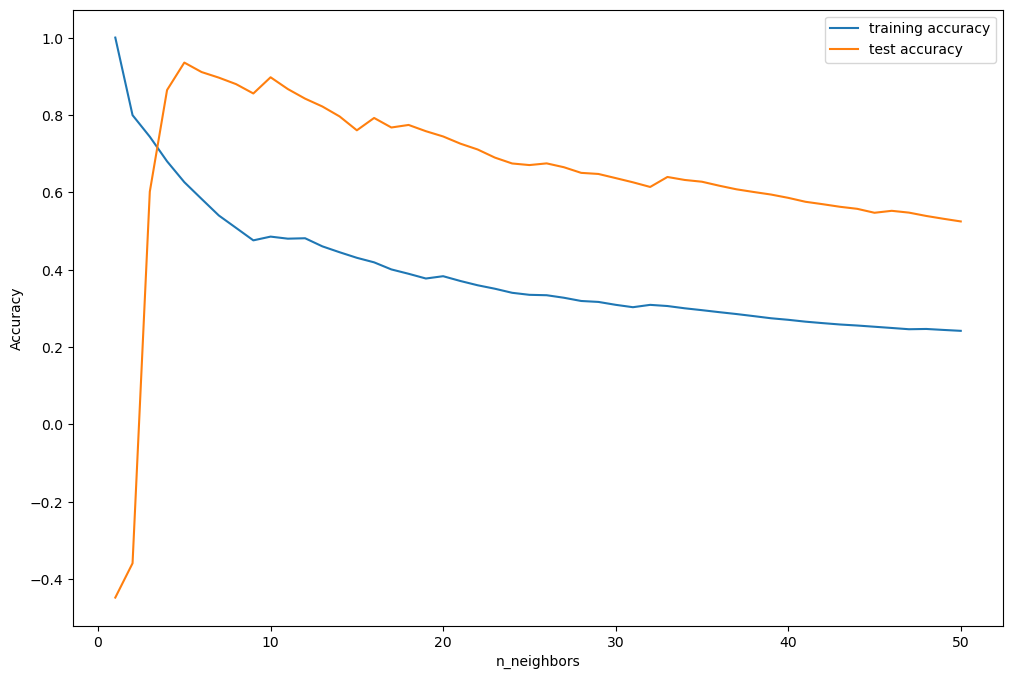

In [36]:
# Creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# Building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# Plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [37]:
# INSTANTIATING a model with the optimal number of neighbors
model = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 2)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


# SCORING results

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# Displaying results

print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 264105.20539764134
MSE of testing set: 388531.3993653672
RMSE of training set: 513.9117
RMSE of testing set: 623.3229


In [38]:
# Hyperparameter Tuning

# Declaring a hyperparameter space
n_neighbors_range = np.arange(1, 31, 1)
weights_options = ['uniform', 'distance']
p_options = [1, 2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = np.arange(10, 51, 15)

# Creating a hyperparameter grid
knn_hyperparameters = {
    'n_neighbors': n_neighbors_range,
    'weights': weights_options,
    'p': p_options,
    'algorithm': algorithm,
    'leaf_size': leaf_size
}


# INSTANTIATING the model object without hyperparameters
tuned_KNN = KNeighborsRegressor()


# RandomizedSearchCV object
tuned_KNN_cv = RandomizedSearchCV(estimator             = tuned_KNN, #model
                                  param_distributions   = knn_hyperparameters, #hypermarameter ranges
                                  cv                    = 5, #folds
                                  n_iter                = 100, #how many models to build
                                  random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_KNN_cv.fit(x_data, y_data)



# Printing the optimal parameters and best score

print("Tuned Parameters        :", tuned_KNN_cv.best_params_)
print("Tuned Training R-Squared:", tuned_KNN_cv.best_score_.round(4))

Tuned Parameters        : {'weights': 'uniform', 'p': 2, 'n_neighbors': 6, 'leaf_size': 40, 'algorithm': 'auto'}
Tuned Training R-Squared: 0.6223


In [39]:
# INSTANTIATING a logistic regression model with tuned values
model = KNeighborsRegressor(n_neighbors=6, 
                             leaf_size=40, 
                             algorithm='auto', 
                             p=2, 
                             weights='uniform')

# FITTING to the TRAINING data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


# SCORING results

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# Displaying results

print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 549084.8202046164
MSE of testing set: 25470.88098116249
RMSE of training set: 741.0026
RMSE of testing set: 159.596


<h4> Model Results </h4>

In [40]:
# Organizing residuals
model_residuals = {"True": y_test,
                   "Predicted": y_pred_test,
                   "Residuals": y_test - y_pred_test}

# Converting residuals into df
model_resid_df = pd.DataFrame(model_residuals)

# Checking results
print(model_resid_df.head(n=10))

           True   Predicted   Residuals
entry_id                               
mkt_4258    1.0    2.166667   -1.166667
mkt_201     1.0    2.833333   -1.833333
mkt_800   568.0  290.000000  278.000000
mkt_578     5.0   10.166667   -5.166667
mkt_2211    4.0    7.333333   -3.333333
mkt_1276    1.0    2.166667   -1.166667
mkt_2786    1.0    3.000000   -2.000000
mkt_1442    4.0    3.666667    0.333333
mkt_1765   30.0   48.833333  -18.833333
mkt_1815    4.0    3.000000    1.000000


<h3> Lasso Regression </h3>

In [41]:
# Lasso Regression
model_name = "Lasso Regression" 

model = sklearn.linear_model.Lasso()

In [42]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)



# SCORING results
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# Displaying results
print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 839209.685035758
MSE of testing set: 220868.29486234294
RMSE of training set: 916.0839
RMSE of testing set: 469.9663


<h3> Ridge Regression </h3>

In [43]:
## Candidate Modeling ##
# Ridge Regression
model_name = "Ridge Regression" 

model = sklearn.linear_model.Ridge() 

In [44]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# SCORING results
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# Displaying results
print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 836264.1389010071
MSE of testing set: 232478.56497008805
RMSE of training set: 914.4748
RMSE of testing set: 482.1603


In [45]:
# Hyperparameter Tuning

# Define the parameter grid for Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_regressor = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge_regressor, param_grid=ridge_params, cv=5)

# Fit the grid search to the data
ridge_grid_search.fit(x_train, y_train)

# Predicting using the best estimator found by GridSearchCV for both train and test sets
y_pred_train = ridge_grid_search.best_estimator_.predict(x_train)
y_pred_test = ridge_grid_search.best_estimator_.predict(x_test)

# Calculating the MSE for both train and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculating the RMSE for both train and test sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Printing the MSE and RMSE
print(f"MSE for training set: {mse_train:.4f}")
print(f"MSE for testing set: {mse_test:.4f}")
print(f"RMSE for training set: {rmse_train:.4f}")
print(f"RMSE for testing set: {rmse_test:.4f}")

MSE for training set: 918669.4241
MSE for testing set: 150341.9412
RMSE for training set: 958.4724
RMSE for testing set: 387.7395


<h4> Model Results </h4>

In [46]:
## Model Results ##
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)


('intercept', 2899.1352)
('Search Engine Bid', 1282.0685)
('Impressions', 337.0596)
('Avg. Pos.', 15.4182)
('Avg. Cost per Click', -46.9788)
('Keyword Count', 62.7511)
('Keyword Length', -103.1309)
('Medium_Impressions', -333.6004)
('Publisher Name_Google - Global', 786.3063)
('Publisher Name_Overture - Global', -451.1011)
('Publisher Name_Yahoo', -436.8571)
('Match Type_Broad', -385.8057)
('Match Type_Exact', 2144.968)
('Match Type_Other', -846.0854)
('Bid Strategy_Position 1-3', -525.025)
('Bid Strategy_Position 2-5 Bid Strategy', -458.9183)
('Bid Strategy_Position 3-6', -693.7056)
('Bid Strategy_Position 5-10 Bid Strategy', -298.8098)
('Status_Live', -221.9996)
('Status_Paused', -128.3554)
('Status_Sent', -281.94)
('Campaign_Air France Brand & French Destinations', -481.3068)
('Campaign_Air France Branded', 1347.8584)
('Campaign_Air France Global Campaign', -804.5883)
('Campaign_Business Class', -776.0362)
('Campaign_Geo Targeted Central', 467.0509)
('Campaign_Geo Targeted East', 45

In [47]:
# Organizing residuals
model_residuals = {"True": y_test,
                   "Predicted": y_pred_test,
                   "Residuals": y_test - y_pred_test}

# Converting residuals into df
model_resid_df = pd.DataFrame(model_residuals)

# Checking results
print(model_resid_df.head(n=10))

           True   Predicted   Residuals
entry_id                               
mkt_4258    1.0   51.791391  -50.791391
mkt_201     1.0   25.452731  -24.452731
mkt_800   568.0  614.132361  -46.132361
mkt_578     5.0   72.488148  -67.488148
mkt_2211    4.0 -228.823552  232.823552
mkt_1276    1.0   25.462150  -24.462150
mkt_2786    1.0   70.502256  -69.502256
mkt_1442    4.0  -54.887184   58.887184
mkt_1765   30.0  197.260734 -167.260734
mkt_1815    4.0 -250.877079  254.877079


<h3> Elastic Net Regression </h3>

In [48]:
# Elastic Net Regression
model_name = "Elastic Net Regression" 

elastic_net_model = SGDRegressor(penalty='elasticnet', l1_ratio=0.5)

In [49]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)

# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# SCORING results
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# Displaying results
print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 836264.1389010071
MSE of testing set: 232478.56497008805
RMSE of training set: 914.4748
RMSE of testing set: 482.1603


<h3> Linear Regression </h3>

In [50]:
# Linear Regression
model_name = "Linear Regression" 

model = sklearn.linear_model.LinearRegression() 

In [51]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# SCORING results
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# Displaying results
print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 831926.588661099
MSE of testing set: 244185.72541062647
RMSE of training set: 912.1001
RMSE of testing set: 494.1515


<h3> Decision Tree Regression </h3>

In [52]:
## Candidate Modeling ##

# Decision Tree Regression 
model_name = "Tree" 

model = sklearn.tree.DecisionTreeRegressor()

In [53]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)

# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# SCORING results
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# Displaying results
print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 0.0
MSE of testing set: 1146263.9329102447
RMSE of training set: 0.0
RMSE of testing set: 1070.6372


In [54]:
# Hyperparameter Tuning

# Declaring a hyperparameter space
criterion_range = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter_range  = ["best", "random"]
depth_range     = np.arange(1,10, 1)
leaf_range      = np.arange(1, 20, 5)


# Creating a hyperparameter grid
param_grid = {'criterion'         : criterion_range,
              'splitter'          : splitter_range,
              'max_depth'         : depth_range,
              'min_samples_leaf' : leaf_range
             }

# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeRegressor(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, #model
                                   param_distributions   = param_grid, #hyperparameter ranges
                                   cv                    = 5, #folds
                                   n_iter                = 50, #how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, y_data)



# Printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training R-Square:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 6, 'max_depth': 4, 'criterion': 'absolute_error'}
Tuned Training R-Square: 0.4993


In [55]:
# INSTANTIATING a logistic regression model with tuned values
model = DecisionTreeRegressor(splitter = 'best', min_samples_leaf = 6, max_depth = 4, criterion = 'absolute_error',random_state = 702)


# FITTING to the TRAINING data
model.fit(x_train, y_train)

# PREDICTING based on the testing set
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# SCORING results
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train).round(4)
rmse_test = np.sqrt(mse_test).round(4)

# displaying results
print(f'MSE of training set: {mse_train}')
print(f'MSE of testing set: {mse_test}')
print(f'RMSE of training set: {rmse_train}')
print(f'RMSE of testing set: {rmse_test}')

MSE of training set: 856117.7856062896
MSE of testing set: 138044.22076155938
RMSE of training set: 925.2663
RMSE of testing set: 371.543


<h4> Model Results </h4>

In [56]:
# Organizing residuals
model_residuals = {"True": y_test,
                   "Predicted": y_pred_test,
                   "Residuals": y_test - y_pred_test}

# Converting residuals into df
model_resid_df = pd.DataFrame(model_residuals)

# Checking results
print(model_resid_df.head(n=10))

           True  Predicted  Residuals
entry_id                             
mkt_4258    1.0        1.0        0.0
mkt_201     1.0        5.0       -4.0
mkt_800   568.0       33.0      535.0
mkt_578     5.0       12.0       -7.0
mkt_2211    4.0        1.0        3.0
mkt_1276    1.0        1.0        0.0
mkt_2786    1.0        1.0        0.0
mkt_1442    4.0        1.0        3.0
mkt_1765   30.0        5.0       25.0
mkt_1815    4.0        1.0        3.0


<h2> Creating Submission File for Kaggle </h2>

In [57]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()

# y-data
y_data_kaggle = kaggle_data[y_variable]

# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)


# organizing predictions
model_predictions = {"Clicks" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)


In [58]:
## Kaggle Submission File ##

# sending predictions to .csv
model_pred_df.to_csv(path_or_buf = "/Users/kimberly/Downloads/A1_1.csv",
                     index       = True,
                     index_label = 'entry_id')

<h2> Analysis </h2>


<h4> Model Introduction </h4>
The study utilizes a Decision Tree model from scikit-learn, known for its efficiency and relevance to real-world problems. The Decision Tree model stands out for its ability to handle complex datasets and uncover intricate patterns that can inform strategic marketing decisions. By mapping out decisions and their possible consequences, this model is suited to explore the various SEM campaign data provided by Air France. It will allow us to identify the most effective strategies for allocating advertising spend, targeting keywords, and selecting the right search engines for online marketing campaigns.

The choice of a Decision Tree model is predicated on its interpretability and ease of use. Decision Trees provide clear insights into the decision-making process, making them an ideal choice for teams that must explain their strategic recommendations. This model was used to predict the number of Clicks in the test data, and gave the highest score out of all models. By leveraging this model, the goal is to deliver actionable insights that can drive Air France's digital marketing strategy forward to achieve higher revenue and a higher return on investment.


<h4> KNN </h4>
Prior to hyperparameter adjustment, the testing set's RMSE was remarkably low and the training set's RMSE was fairly high. This could be because the training and testing sets have very different data distributions, or it could be because the testing set is too small to fairly represent the underlying performance of the model.The RMSE of the training and testing sets both increased after hyperparameter adjustment. The testing set's RMSE significantly decreased, indicating that the updated model may provide a better fit for the dataset. 
Nevertheless, because the test set is short (only 100 rows), the test RMSE may not be stable and may not accurately reflect the generalization capacity of the model.

The graph seems to illustrate how the K parameter affects model correctness. Finding the ideal K value can be aided by the fact that training accuracy typically declines as K increases, while testing accuracy first increases before stabilizing or decreasing. In this instance, we determine that K value is equal to 2.
Finally, regarding the code snippet for hyperparameter tuning, we automatically chose the optimal settings for the KNN model by using RandomizedSearchCV. The RMSE score training set: 741.0026, testing set: 159.596.



<h4> RIDGE </h4>
The model's Mean Squared Error (MSE) on the training set was 836264.1389010077, and on the test set it was 232478.5649700738 prior to hyperparameter adjustment. As a result, for the training set the Root Mean Squared Error (RMSE) was 914.4748, while for the test set it was 482.1603. Following hyperparameter modification, the mean square error (MSE) for the training set dropped to 918669.4241 and for the test set to 150341.9412. The RMSE of the test set dropped to 387.7395 and the RMSE of the training set to 958.4724 concurrently. These modifications show that after the hyperparameter adjustments, the model's predicted accuracy improved.

We can see from looking at the residuals that the model was far wrong on some of the data values. For instance, the residual for the data point mkt_800 was 46 because the actual value was 568 and the anticipated value was 614. This may indicate outliers in the data or biases in the model's predictions under particular circumstances.
However,compared to Lasso,Linear,Elastic Net Regression, Ridge Regression performance the better score.



<h4> DECISION TREE </h4>
Decision tree predicts the value of a target variable, it can also be used in classification and regression. It predicts by following the decisions from root to leaf, which is based on the 30+ features that have been used throughout the process. Specifically, before hyperparameter tuning, the model exhibited near-perfect fitting on the training set with very low MSE:0 and RMSE:0, but significantly higher values on the test set, suggesting overfitting. After hyperparameter tuning, there was an increase in the training set error but a marked decrease in the test set error, indicating improved generalization of the model. While we ideally want the residuals to be as small as possible, small residuals on a small test set do not necessarily reflect the true predictive power of the model. Further data collection and broader cross-validation can help us assess the model's generalization performance more accurately.
